Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
%matplotlib inline

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('/content/supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.220351e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


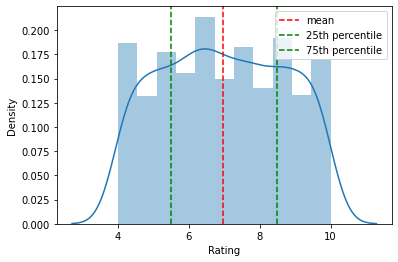

In [7]:
sns.distplot(df['Rating']) 
plt.axvline(x=np.mean(df['Rating']), c='red',ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--',label='75th percentile')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f748d419470>,
      dtype=object)

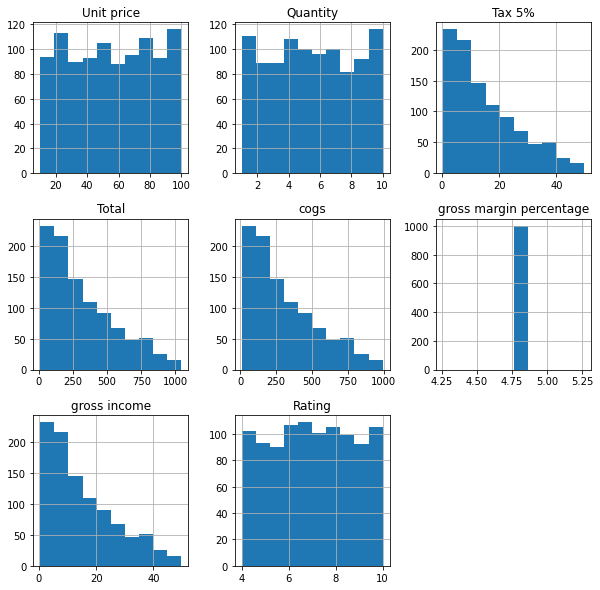

In [8]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


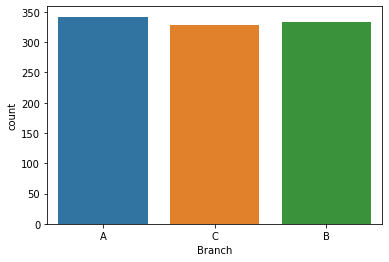

In [9]:
sns.countplot(df['Branch'])

In [10]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


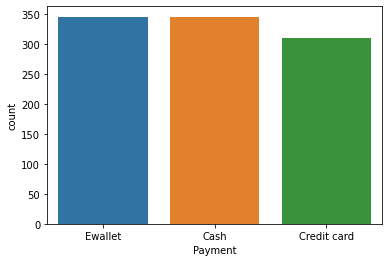

In [11]:
sns.countplot(df['Payment'])

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


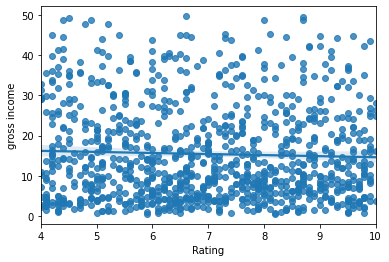

In [12]:
# sns.scatterplot(df['Rating'], df['gross income'])
sns.regplot(df['Rating'], df['gross income'])

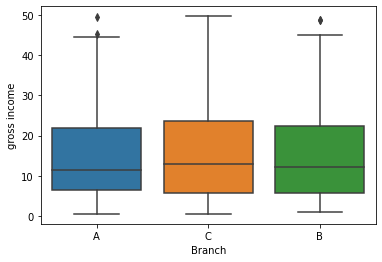

In [13]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

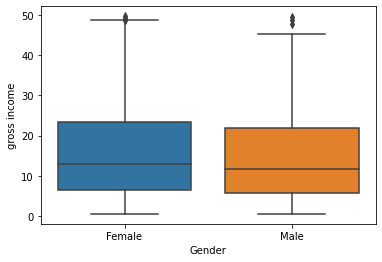

In [14]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

**Question 4:** Is there a noticeable time trend in gross income?

In [15]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7.0,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5.0,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7.0,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8.0,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7.0,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
998,65.82,1.0,3.2910,69.1110,65.82,4.761905,3.2910,4.1
999,88.34,7.0,30.9190,649.2990,618.38,4.761905,30.9190,6.6
1000,88.34,7.0,30.9190,649.2990,618.38,4.761905,30.9190,6.6
1001,NaN,2.0,5.8030,121.8630,116.06,4.761905,5.8030,8.8


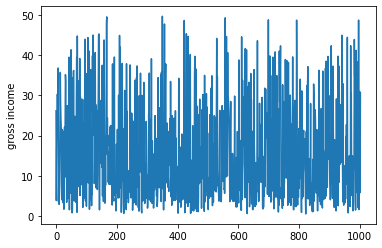

In [16]:
a = df.groupby(df.index).mean().index
sns.lineplot(x=a,y=df.groupby(df.index).mean()['gross income'])

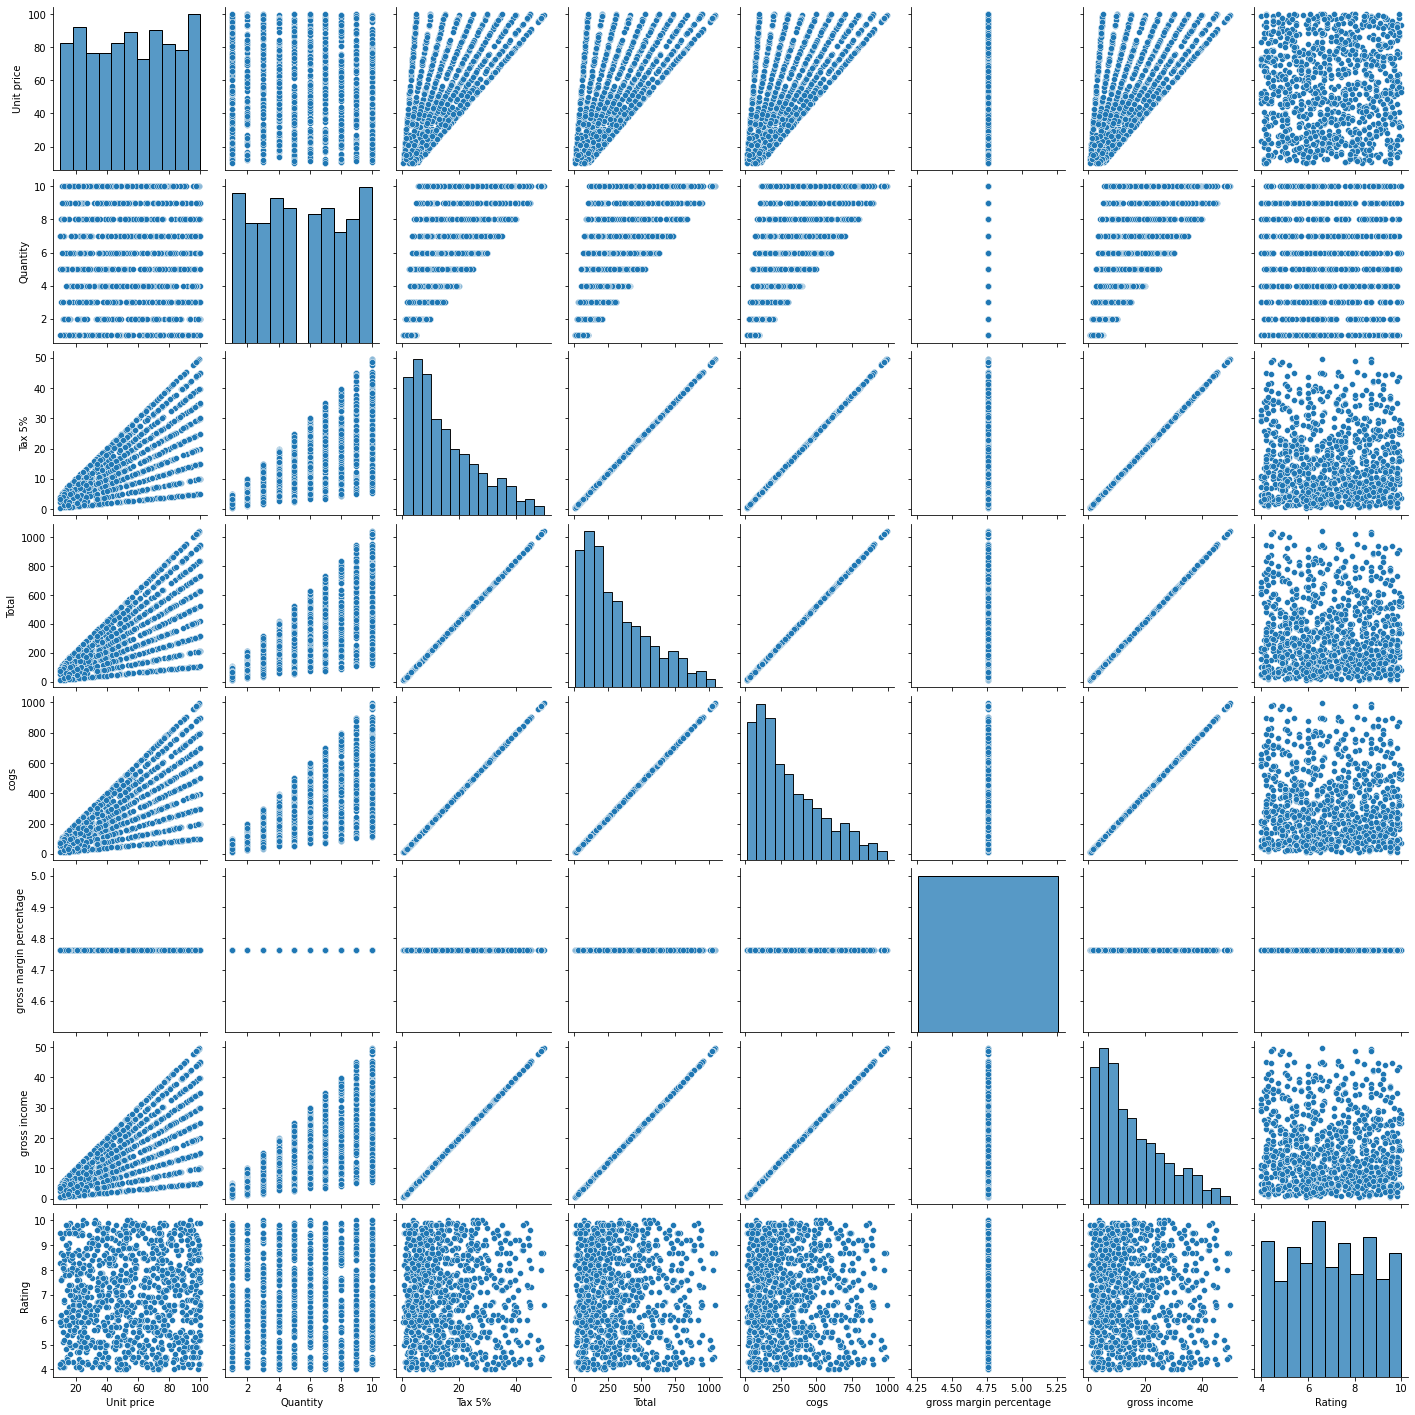

In [17]:
sns.pairplot(df)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [18]:
df.duplicated().sum() #for duplicate rows

3

In [19]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2019-02-18,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,2019-03-10,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,2019-01-26,15:17,Cash,609.56,4.761905,30.478,5.5


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

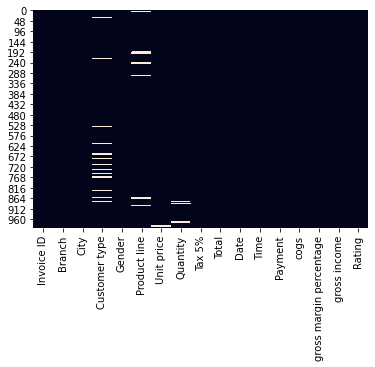

In [22]:
sns.heatmap(df.isnull(),cbar=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


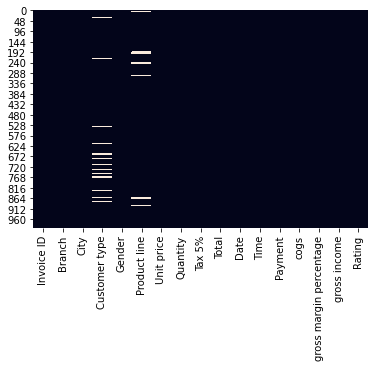

In [23]:
df.fillna(df.mean(), inplace=True);
sns.heatmap(df.isnull(),cbar=False)

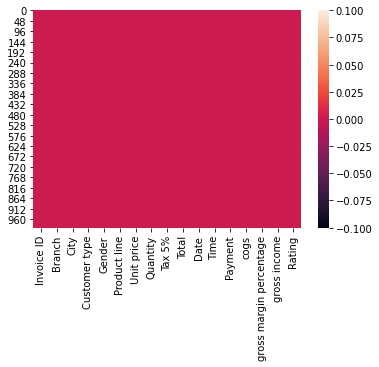

In [24]:
df.fillna(df.mode().iloc[0],inplace=True);
sns.heatmap(df.isnull())

### Task 5: Correlation Analysis

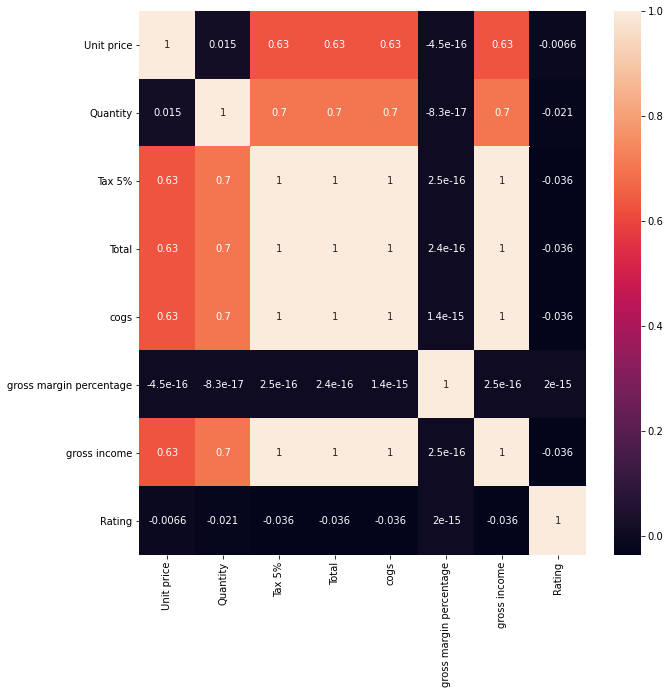

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/